# IoT-driven analytics solution to identify and quantify the performance gaps between the actual power output of a wind turbine (measured via SCADA) and the theoretical power curve provided by the manufacturer. This solution should leverage real-time wind speed and direction data to dynamically assess turbine performance.

# DO KNOW IT?

# THEORIES AND CONCEPTS

# ABOUT THE PROJECT


# ABOUT THE DATASET

# APPROACH TO THE PROBLEM STATEMENT

# STEP-1
DATA COLLECTION

In [1]:
#Importing numpy, pandas, matplotlib and seaborn libraries

#Numpy- numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
#Pandas- pandas is a software library written for the Python programming language for data manipulation and analysis.
#Matpotlib- Matplotlib is a plotting library for the Python programming language. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkit.
#Seaborn- Seaborn is a library in Python predominantly used for making statistical graphics. It is a data visualization library built on top of matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset(.csv file- "comma seperated values") using pandas library
#Storing it in a dataset object as dataframe

In [4]:
dataset=pd.read_csv('T1.csv')
dataset

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# STEP-2
DATA WRANGLING/PREPROCESSING/CLEANING

In [5]:
#Retrieving the complete information about the dataset using .info()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [7]:
#Retrieving the statistical data about the dataset using .describe()

In [8]:
dataset.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [9]:
#Checking whether the dataset has any NULL values using .isnull.any()--->returns boolean value i.e.True or False
#If any field contains 0 then it is not a "NULL" value field

In [10]:
dataset.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [11]:
#Removing unwanted coloumns using .drop()
#We use coloumn names to indicate respective coloumns
#axis=0 denotes complete row
#axis=1 denotes complete coloumn
#inplace=True--->denotes making the change permanent and effective to the dataset as a whole.By default, the value of "inplace" is False

In [12]:
dataset.drop(['Date/Time','Wind Direction (°)'],axis=1,inplace=True)

In [13]:
#Viewing the dataset using the object name of the dataset itself i.e. here it is "dataset"

In [14]:
dataset

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


In [15]:
#Retrieving the shape of the dataset i.e. (rows, coloumns) using .shape

In [16]:
dataset.shape

(50530, 3)

In [17]:
#Checking for outliers in the coloumns of the dataset
#Outliers--->Any value in a coloumn(variable) that is distant from the other values belonging to same coloum(variable)
#Ouliers can be detected using--->boxplot, Z-Score and IQR
#Outliers can be removed using--->Z-Score, IQR i.e. if beyond their respective range are outliers
#Z-Score range--->[-3,3]
#IQR range--->[Q1-1.5*IQR,Q3+1.5*IQR]

C:\Users\mrp24\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind Speed (m/s)'>

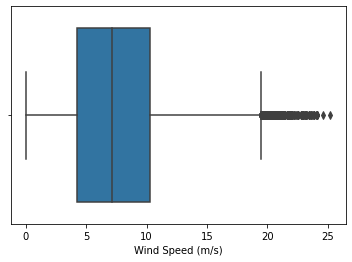

In [18]:
sns.boxplot(dataset['Wind Speed (m/s)'])

C:\Users\mrp24\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Theoretical_Power_Curve (KWh)'>

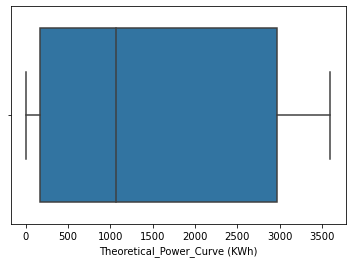

In [19]:
sns.boxplot(dataset['Theoretical_Power_Curve (KWh)'])

C:\Users\mrp24\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LV ActivePower (kW)'>

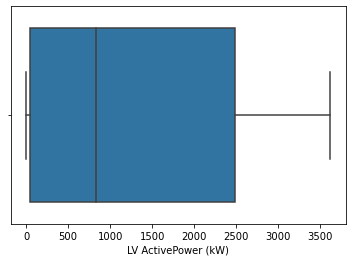

In [20]:
sns.boxplot(dataset['LV ActivePower (kW)'])

In [21]:
#Importing stats from scipy to calculate Z-Score value for each field in the dataset

In [22]:
from scipy import stats

In [23]:
#Calculating the Z-Score and making the Z-Score value absolute so that we can retrieve the no ouliers dataset using the condition >3 as, Z-Score range is [-3,3]
#Converting into numpy array in order to perform search for ouliers by index, this can be done using array operations

In [24]:
z=np.abs(stats.zscore(dataset))
z

array([[0.70679964, 0.53147626, 0.78643484],
       [0.65062865, 0.44611545, 0.71071243],
       [0.76293238, 0.55402096, 0.80502315],
       ...,
       [0.68073081, 0.20756566, 0.21645342],
       [0.92042608, 0.44082298, 0.6770496 ],
       [1.1526428 , 0.57281963, 0.94079255]])

In [25]:
#Taking the threshold as 3, because any Z-Score value above 3 will be an outlier
#And retrieving the row and coloumn numbers of the outlier using .where(), which returns the row and coloumn index 

In [26]:
threshold=3
np.where(z>threshold)

(array([ 2407,  2408,  2410,  2411,  2412,  2413,  2414,  2415,  2416,
         2436,  2437,  2438,  2439,  2444,  2747,  2748,  2849,  2851,
         2856,  2857,  2858,  2859,  2860,  2861,  3949,  3950,  3951,
         3952,  3953,  3954,  3955,  3961,  3962,  3965,  3966,  3967,
         3968,  3969,  3970,  3971,  3972,  3976,  3977,  3979,  3980,
         3982,  3983,  3984,  3985,  3986,  3987,  3988,  3989,  3990,
         3991,  3992,  3993,  3994,  3995,  3996,  4003,  4006,  4007,
         4025,  4026,  4139,  4140,  4141,  4156,  4157,  4179,  4208,
         4210,  4217,  4218,  4219,  4220,  4223,  4225,  4226,  4227,
         4228,  4229,  4230,  4231,  4232,  4233,  4234,  4235,  4236,
         4237,  4238,  4239,  4240,  4241,  4242,  4243,  4244,  4245,
         4246,  4247,  4248,  4249,  4250,  4251,  4252,  4253,  4254,
         4255,  4256,  4257,  4258,  4259,  4260,  4261,  4262,  4263,
         4266,  4267,  4268,  4270,  4272,  4274,  4275,  4276,  4277,
      

In [27]:
#Removing all the oulier values along with the row that it is present, ionorder to have a clean pre-processed dataset
#Simply, done by reversing the condition as Z-score value is less than and equal to 3
#Without disturbing the original dataset i.e. has object name as "dataset", the no ouliers array is converted implicitly to a dataframe and stored in a new object named "dataset_no_outliers"

In [28]:
dataset_no_outliers=dataset[(z<=3).all(axis=1)]
dataset_no_outliers

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


In [29]:
#Explicitly, converting the dataset named "dataset_no_outliers" into dataframe using .DataFrame() in pandas library
#The explicitly converted dataset into dataframe is stored again in a new dataset object(dataframe) named "clean_df"

In [30]:
clean_df= pd.DataFrame(dataset_no_outliers)
clean_df

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,380.047791,5.311336,416.328908
1,453.769196,5.672167,519.917511
2,306.376587,5.216037,390.900016
3,419.645905,5.659674,516.127569
4,380.650696,5.577941,491.702972
...,...,...,...
50525,2963.980957,11.404030,3397.190793
50526,1684.353027,7.332648,1173.055771
50527,2201.106934,8.435358,1788.284755
50528,2515.694092,9.421366,2418.382503


In [31]:
#Retrieving the shape of the clean dataset without outliers i.e. "clean_df"

In [32]:
clean_df.shape

(50302, 3)

In [33]:
#REQUIRED DATASET SPLITTING
#Separating the independent and dependent variables in two dataframes converted into arrays using .values
#x1--->numpy array of independent variables--->has 1 independent variable--->Must be two-dimensional array
#y1--->numpy array of dependent variables--->has 1 dependent variable--->must be single dimensional array

In [34]:
x1=clean_df.iloc[:,1:2].values
y1=clean_df.iloc[:,0].values

In [35]:
#Retrieving numpy array x1 of independent variables--->REQUIRED DATASET

In [36]:
x1

array([[5.31133604],
       [5.67216682],
       [5.2160368 ],
       ...,
       [8.43535805],
       [9.42136574],
       [9.97933197]])

In [37]:
#Retrieving numpy array y1 of dependent variables--->REQUIRED DATASET

In [38]:
y1

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

In [39]:
#COMPARATIVE DATASET SPLITTING
#Separating the independent and dependent variables in two dataframes converted into arrays using .values
#x2--->numpy array of independent variables--->has 1 independent variable--->Must be two-dimensional array
#y2--->numpy array of dependent variables--->has 1 dependent variable--->Must be one-dimensional array

In [40]:
x2=clean_df.iloc[:,1:2].values
y2=clean_df.iloc[:,2].values

In [41]:
#Retrieving numpy array x2 of independent variables--->COMPARATIVE DATASET

In [42]:
x2

array([[5.31133604],
       [5.67216682],
       [5.2160368 ],
       ...,
       [8.43535805],
       [9.42136574],
       [9.97933197]])

In [43]:
#Retrieving numpy array y2 of dependent variables--->COMPARATIVE DATASET

In [44]:
y2

array([ 416.32890782,  519.91751106,  390.90001581, ..., 1788.28475526,
       2418.38250336, 2779.18409628])

# STEP-3
DATA ANALYSIS

In [45]:
#Plotting a graph for REQUIRED DATA ANALYSIS using .scatter(),.xlabel(),.ylabel(),.title(),.show() from matplotlib library for independent variable in numpy array x1 Vs Dependent variable in numpy array y1

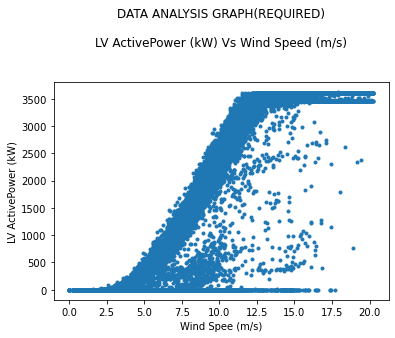

In [46]:
plt.scatter(x1,y1,marker='.')
plt.xlabel("Wind Spee (m/s)")
plt.ylabel("LV ActivePower (kW)")
plt.title("DATA ANALYSIS GRAPH(REQUIRED)\n\nLV ActivePower (kW) Vs Wind Speed (m/s)\n\n")
plt.show()

In [47]:
#Plotting a graph for COMPARATIVE DATA ANALYSIS using .scatter(),.xlabel(),.ylabel(),.title(),.show() from matplotlib library for independent variable in numpy array x2 Vs Dependent variable in numpy array y2

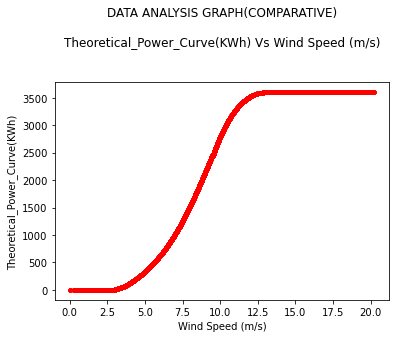

In [48]:
plt.scatter(x2,y2,color='red',marker='.')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Theoretical_Power_Curve(KWh)")
plt.title("DATA ANALYSIS GRAPH(COMPARATIVE)\n\nTheoretical_Power_Curve(KWh) Vs Wind Speed (m/s)\n\n")
plt.show()

# STEP-4
SELECTION OF SUITABLE ALGORITHM TO BUILD THE MACHINE LEARNING MODEL

# STEP-5
BULDING A MACHINE LEARNING MODEL USING THE SELECTED ALGORITHM AND
TRAINING & TESTING THE MACHINE LEARNING MODEL

In [49]:
#REQUIRED DATASET--->SPLITTING INTO TRAIN AND TEST
#Splitting the dataset into train and test i.e. 80% of dataset to train and 20% to test
#Using train_test_split from sklearn library
#Train dataset--->x_train1(Input), y_train1(Output)
#Test dataset--->x_test1(Input), y_test1(Output)
#random_state=0, means to select randomly the test and train dataset at a unique pattern denoted by value 0
#People taking same random_state value has most probably same set of train and test datasets for a given dataset

In [50]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [51]:
#COMPARATIVE DATASET--->SPLITTING INTO TRAIN AND TEST
#Splitting the dataset into train and test i.e. 80% of dataset to train and 20% to test
#Using train_test_split from sklearn library
#Train dataset--->x_train2(Input), y_train2(Output)
#Test dataset--->x_test2(Input), y_test2(Output)
#random_state=0, means to select randomly the test and train dataset at a unique pattern denoted by value 0
#People taking same random_state value have most probably same set of train and test datasets for a given dataset

In [52]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=0)

# DECISION TREE REGRESSION ALGORITHM

# REQURIED MODEL

In [53]:
#importing DecisionTreeRegressor from scklearn.tree
#this is to implement the model based on Decision Tree Regression Algorithm

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [56]:
#using .fit() for training the model on the train dataset--->x_test1,y_test1

In [57]:
dt1.fit(x_train1,y_train1)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [58]:
#Retrieving the data in x_test1 numpy array, using the object of the independent variable test data itself

In [59]:
x_test1

array([[ 4.40126801],
       [ 6.9117322 ],
       [ 8.45018005],
       ...,
       [ 3.90180707],
       [13.14091969],
       [12.60923958]])

In [60]:
#Predicitng the y_predd1--->LV ActivePower (KW) based on x_test1 --->Wind Speed(m/s)

In [61]:
y_predd1=dt1.predict(x_test1)
y_predd1

array([ 166.2340771 ,  779.66380606, 1558.68294034, ...,   11.99836454,
       3432.40385453, 3432.40385453])

In [62]:
#Retrieving the data in y_test1 numpy array, using the object of the dependent variable test data itself

In [63]:
y_test1

array([ 162.8795929 ,  871.90838623, 1712.74694824, ...,   92.1014328 ,
       3523.72900391, 3478.28198242])

In [64]:
#Visualisation of the Decision Tree formed for building the model
#Using the following snippet of code and providing the model(based on algorithm) object--->dt1 as a parameter to the snippet.

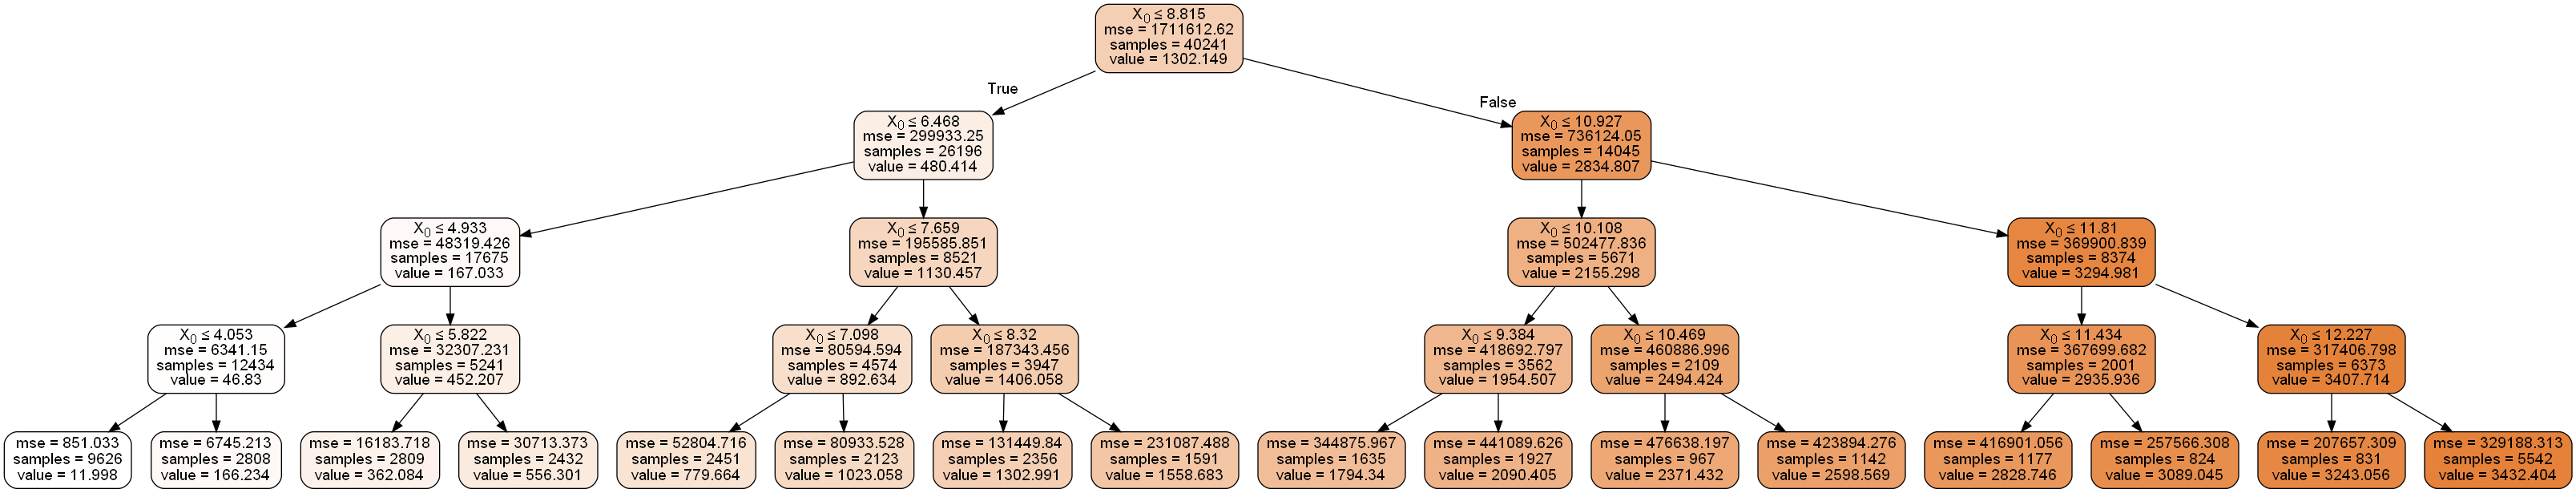

In [65]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt1,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [66]:
#Checking the accuracy, using r2_score from sklearn.metrics
#LV ActivePower (KW)(Predicited)--->y_predd1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_predd1)

0.9038149882871732

In [68]:
#Checking the accuracy,using mean_squared_error from sklearn.metrics
#LV ActivePower (KW)(Predicited)--->y_predd1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [69]:
from sklearn.metrics import mean_squared_error
msed1=mean_squared_error(y_test1,y_predd1)
msed1

162353.8923483697

In [70]:
#Checking the accuracy,using root mean squared error, simply by applying square root to mean squared error
#importing sqrt() from math library in python
#LV ActivePower (KW)(Predicited)--->y_predd1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [71]:
from math import sqrt
rmsed1=sqrt(msed1)
rmsed1

402.9316224229239

# DECISION TREE REGRESSION MODEL:

# REQUIRED MODEL

# LV Active Power(KW):PREDICTED  Vs  OBSERVED

In [72]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

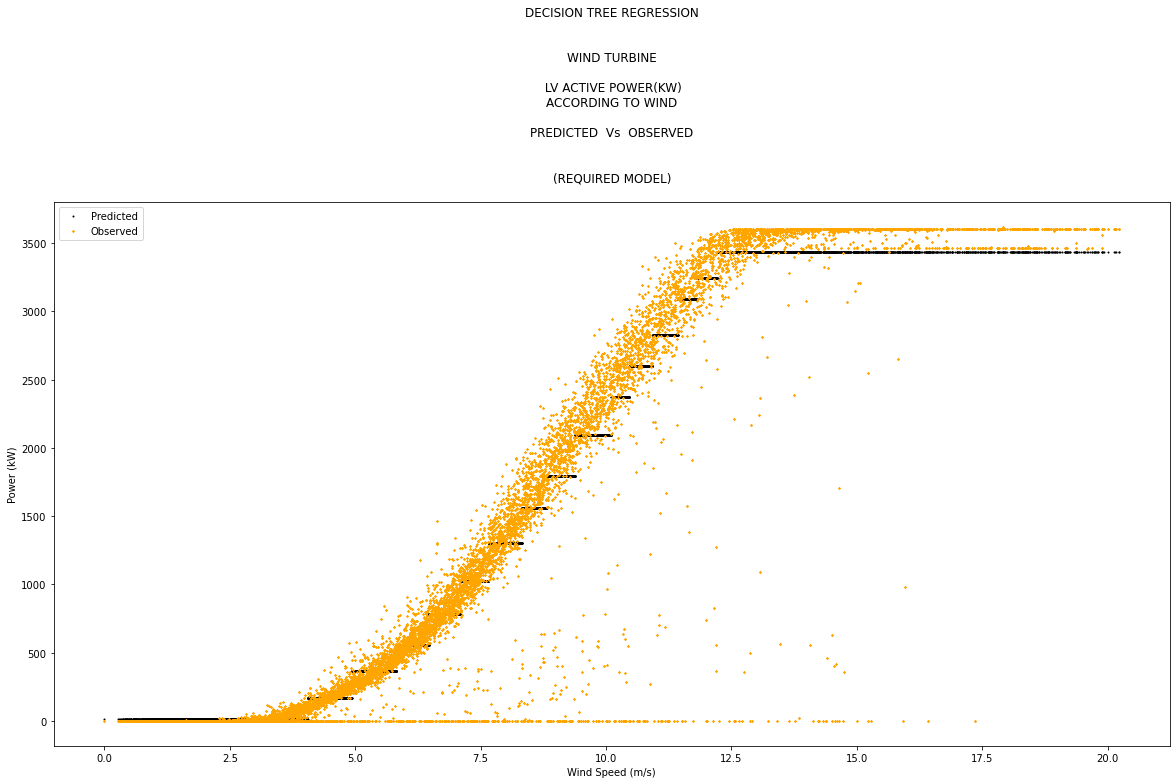

In [73]:
plt.figure(figsize=(20,10))
plt.plot(x_test1,y_predd1,'black', marker='.',markersize=2,linewidth = 0,label="Predicted")
plt.plot(x_test1,y_test1,'orange', marker="*",markersize=2,linewidth = 0,label="Observed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("DECISION TREE REGRESSION\n\n\nWIND TURBINE\n\n LV ACTIVE POWER(KW)\nACCORDING TO WIND\n\nPREDICTED  Vs  OBSERVED\n\n\n(REQUIRED MODEL)\n")
plt.legend()
plt.show()

# COMPARISION MODEL

In [74]:
dt2=DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)

In [75]:
#using .fit() for training the model on the train dataset--->x_test2,y_test2

In [76]:
dt2.fit(x_train2,y_train2)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [77]:
#Retrieving the data in x_test2 numpy array, using the object of the independent variable test data itself

In [78]:
x_test2

array([[ 4.40126801],
       [ 6.9117322 ],
       [ 8.45018005],
       ...,
       [ 3.90180707],
       [13.14091969],
       [12.60923958]])

In [79]:
#Predicitng the y_predd2--->Theoretical_Power_Curve(KWh) based on x_test2 --->Wind Speed(m/s)

In [80]:
y_predd2=dt2.predict(x_test2)
y_predd2

array([ 168.10711595, 1058.95269781, 1645.6750063 , ...,  168.10711595,
       3590.03412966, 3590.03412966])

In [81]:
#Retrieving the data in y_test2 numpy array, using the object of the dependent variable test data itself

In [82]:
y_test2

array([ 201.38878471,  976.74371524, 1797.36226597, ...,  109.91830552,
       3600.        , 3586.3916911 ])

In [83]:
#Visualisation of the Decision Tree formed for building the model
#Using the following snippet of code and providing the model(based on algorithm) object--->dt2 as a parameter to the snippet.

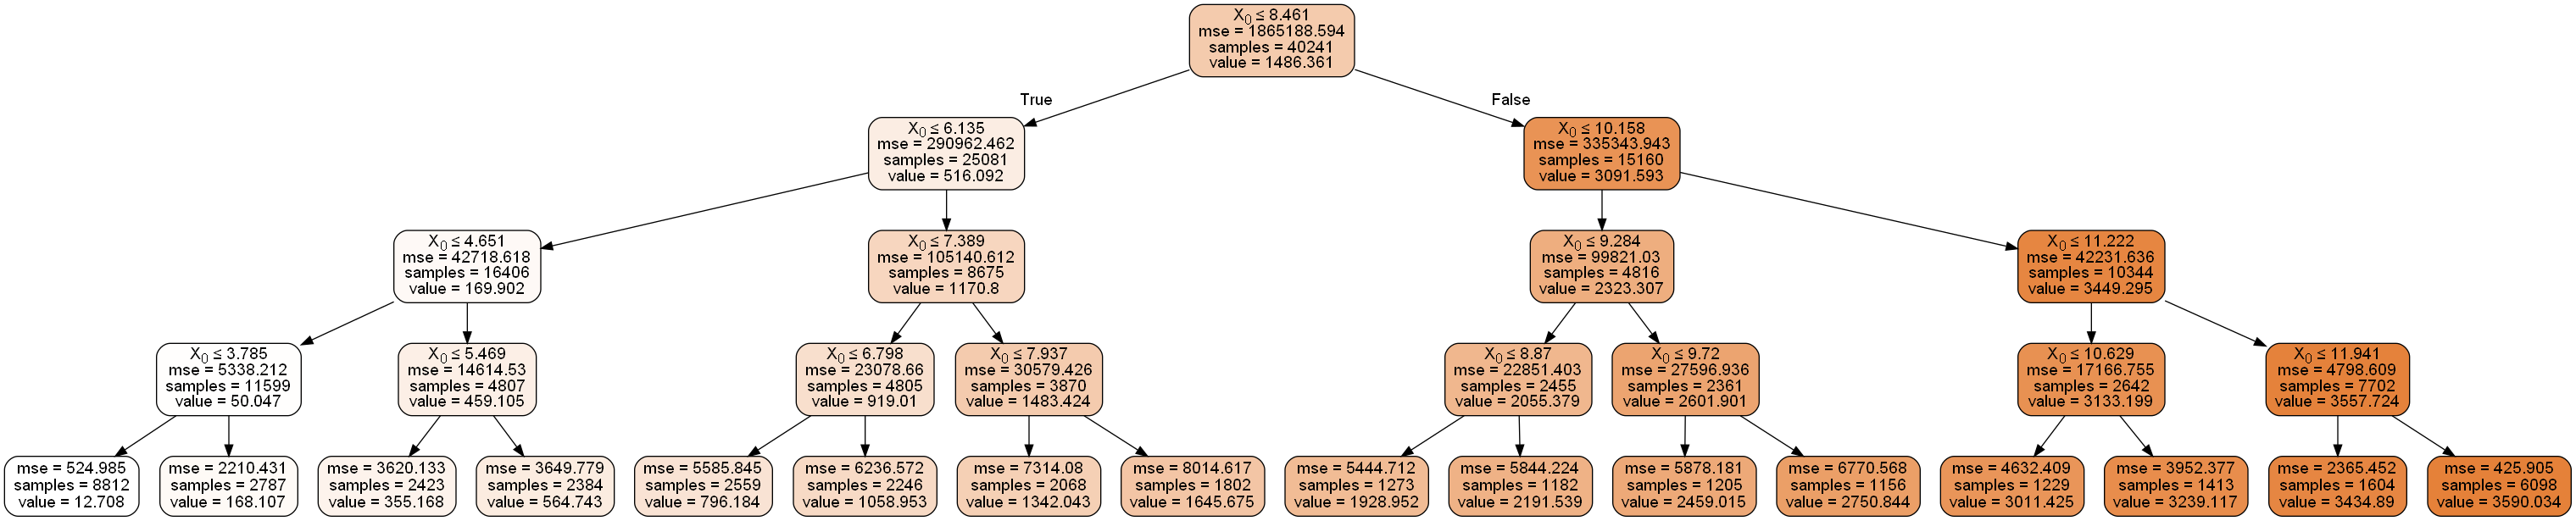

In [84]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt2,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [85]:
#Checking the accuracy, using r2_score from sklearn.metrics
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predd2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_predd2)

0.9981768941372815

In [87]:
#Checking the accuracy,using mean_squared_error from sklearn.metrics
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predd2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [88]:
msed2=mean_squared_error(y_test2,y_predd2)
msed2

3349.8067942647067

In [89]:
#Checking the accuracy,using root mean squared error, simply by applying square root to mean squared error
#importing sqrt() from math library in python
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predd2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [90]:
rmsed2=sqrt(msed2)
rmsed2

57.87751544654199

# DECISION TREE REGRESSION MODEL:

# COMPARISON MODEL:

# Theoretical_Power_Curve(KWh):PREDICTED  Vs  OBSERVED

In [91]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

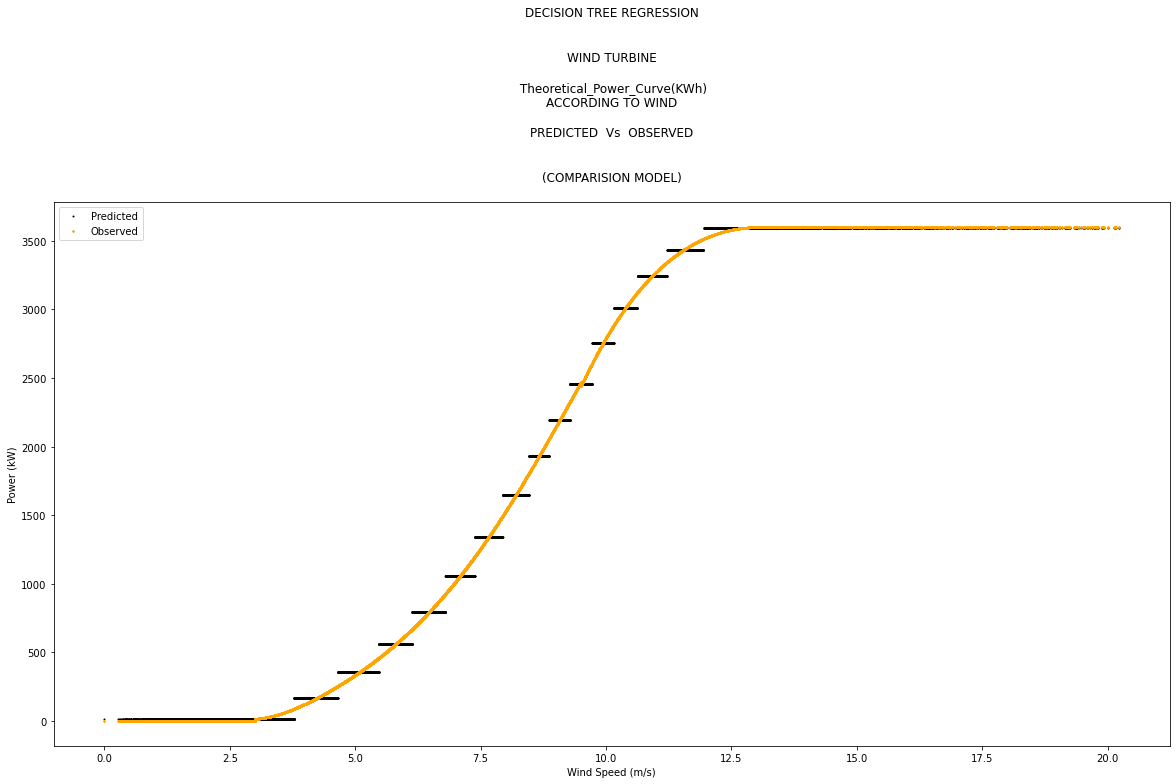

In [92]:
plt.figure(figsize=(20,10))
plt.plot(x_test2,y_predd2,'black', marker='.',markersize=2,linewidth = 0,label="Predicted")
plt.plot(x_test2,y_test2,'orange', marker="*",markersize=2,linewidth = 0,label="Observed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("DECISION TREE REGRESSION\n\n\nWIND TURBINE\n\n Theoretical_Power_Curve(KWh)\nACCORDING TO WIND\n\nPREDICTED  Vs  OBSERVED\n\n\n(COMPARISION MODEL)\n")
plt.legend()
plt.show()

# COMPARING
LV Power Curve(KW) Vs Theoretical Power Curve(KW)

# DECISION TREE REGRESSION MODEL:

# Theoretical Power Curve(KWh)  Vs  LV Active Power(KW)

In [93]:
#Calculating the acuuracy between Theoretical_Power_Curve(KWh) Vs LV Active Power(KW)

In [94]:
r2_score(y_predd1,y_predd2)

0.9533854724691713

In [95]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

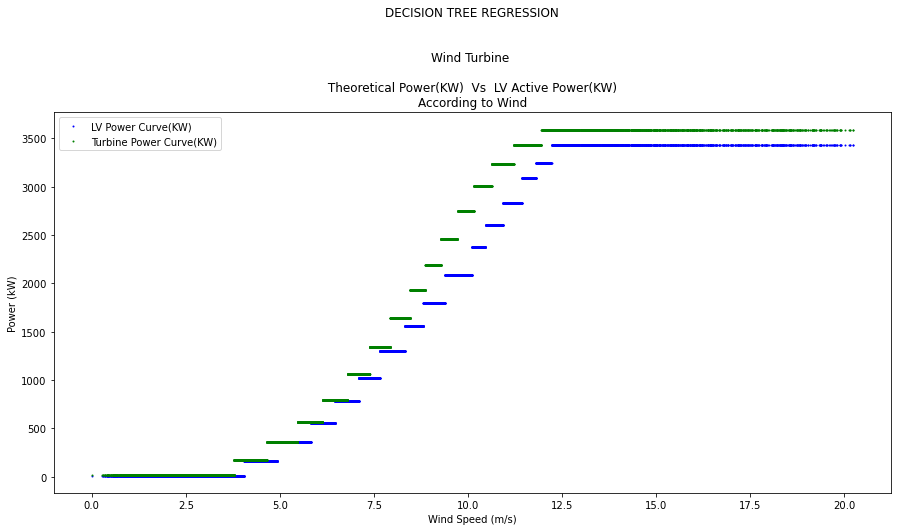

In [96]:
plt.figure(figsize=(15,7))
plt.plot(x_test1,y_predd1,'blue', marker="o",markersize=1,linewidth = 0,label="LV Power Curve(KW)")
plt.plot(x_test2,y_predd2,'green', marker="o",markersize=1,linewidth = 0,label="Turbine Power Curve(KW)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("DECISION TREE REGRESSION\n\n\nWind Turbine \n\n Theoretical Power(KW)  Vs  LV Active Power(KW) \nAccording to Wind")
plt.legend()
plt.show()

# RANDOM FOREST REGRESSION ALGORITHM

# REQUIRED MODEL

In [97]:
#importing RandomForestRegressor from scklearn.tree
#this is to implement the model based on Random forest Regression Algorithm

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
#Initializing the RandomForestRegressor()

In [100]:
RandomForestRegressor()

RandomForestRegressor()

In [101]:
rf1=RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=50,random_state=0)

In [102]:
#using .fit() for training the model on the train dataset--->x_test1,y_test1

In [103]:
rf1.fit(x_train1,y_train1)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=0)

In [104]:
#Retrieving the data in x_test1 numpy array, using the object of the independent variable test data itself

In [105]:
x_test1

array([[ 4.40126801],
       [ 6.9117322 ],
       [ 8.45018005],
       ...,
       [ 3.90180707],
       [13.14091969],
       [12.60923958]])

In [106]:
#Predicitng the y_predr1--->LV ActivePower (KW) based on x_test1 --->Wind Speed(m/s)

In [107]:
y_predr1=rf1.predict(x_test1)
y_predr1

array([ 156.13327968,  785.30607377, 1530.05707397, ...,   34.36485078,
       3392.63097034, 3386.27359652])

In [108]:
#Retrieving the data in y_test1 numpy array, using the object of the dependent variable test data itself

In [109]:
y_test1

array([ 162.8795929 ,  871.90838623, 1712.74694824, ...,   92.1014328 ,
       3523.72900391, 3478.28198242])

In [110]:
#Checking the accuracy, using r2_score from sklearn.metrics
#LV ActivePower (KW)(Predicited)--->y_predr1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [111]:
r2_score(y_test1,y_predr1)

0.9047759726357285

In [112]:
#Checking the accuracy,using mean_squared_error from sklearn.metrics
#LV ActivePower (KW)(Predicited)--->y_predr1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [113]:
mser1=mean_squared_error(y_test1,y_predr1)
mser1

160731.81478456352

In [114]:
#Checking the accuracy,using root mean squared error, simply by applying square root to mean squared error
#importing sqrt() from math library in python
#LV ActivePower (KW)(Predicited)--->y_predr1 Vs LV ActivePower (KW)(Predicited)--->y_test1

In [115]:
root_mean_squarer1=sqrt(mser1)
root_mean_squarer1

400.91372486429486

# RANDOM FOREST REGRESSION MODEL:

# REQUIRED MODEL:

# LV Active Power(KW):PREDICTED  Vs  OBSERVED 

In [116]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

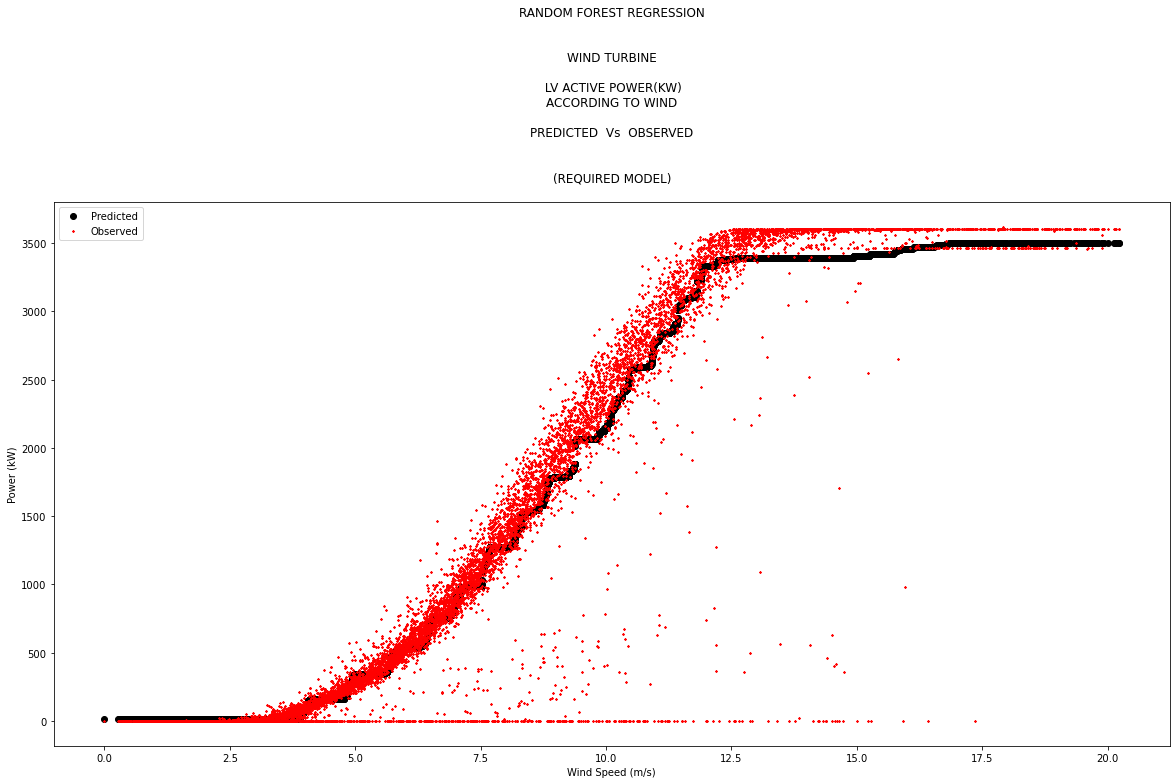

In [117]:
plt.figure(figsize=(20,10))
plt.plot(x_test1,y_predr1,'black', marker="o",markersize=6,linewidth = 0,label="Predicted")
plt.plot(x_test1,y_test1,'red', marker="*",markersize=2,linewidth = 0,label="Observed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("RANDOM FOREST REGRESSION\n\n\nWIND TURBINE\n\n LV ACTIVE POWER(KW)\nACCORDING TO WIND\n\nPREDICTED  Vs  OBSERVED\n\n\n(REQUIRED MODEL)\n")
plt.legend()
plt.show()

# COMPARISON MODEL

In [118]:
rf2=RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=50,random_state=0)

In [119]:
#using .fit() for training the model on the train dataset--->x_test1,y_test1

In [120]:
rf2.fit(x_train2,y_train2)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=0)

In [121]:
#Retrieving the data in x_test2 numpy array, using the object of the independent variable test data itself

In [122]:
x_test2

array([[ 4.40126801],
       [ 6.9117322 ],
       [ 8.45018005],
       ...,
       [ 3.90180707],
       [13.14091969],
       [12.60923958]])

In [123]:
#Predicitng the y_predr2--->LV ActivePower (KW) based on x_test2 --->Wind Speed(m/s)

In [124]:
y_predr2=rf2.predict(x_test2)
y_predr2

array([ 167.63814634, 1059.94982563, 1662.40527042, ...,  167.63814634,
       3590.07538546, 3590.07538546])

In [125]:
#Retrieving the data in y_test2 numpy array, using the object of the dependent variable test data itself

In [126]:
y_test2

array([ 201.38878471,  976.74371524, 1797.36226597, ...,  109.91830552,
       3600.        , 3586.3916911 ])

In [127]:
#Checking the accuracy, using r2_score from sklearn.metrics
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predr2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [128]:
r2_score(y_test2,y_predr2)

0.998419070282376

In [129]:
#Checking the accuracy,using mean_squared_error from sklearn.metrics
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predr2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [130]:
mser2=mean_squared_error(y_test2,y_predr2)
mser2

2904.8280835734195

In [131]:
#Checking the accuracy,using root mean squared error, simply by applying square root to mean squared error
#importing sqrt() from math library in python
#Theoretical_Power_Curve(KWh)(Predicited)--->y_predr2 Vs Theoretical_Power_Curve(KWh)(Predicited)--->y_test2

In [132]:
rmser2=sqrt(mser2)
rmser2

53.896457059563936

# RANDOM FOREST REGRESSION MODEL:

# COMPARISON MODEL

# Theoretical_Power_Curve(KWh):PREDICTED  Vs  OBSERVED 

In [133]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

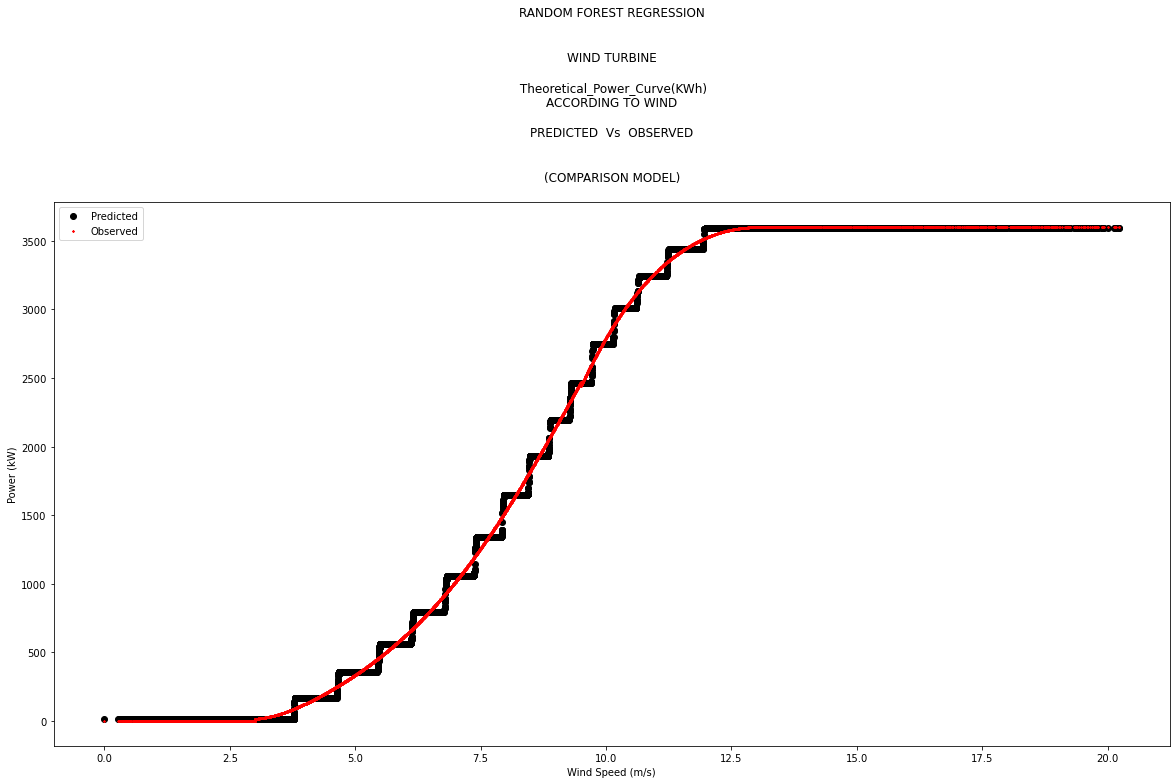

In [134]:
plt.figure(figsize=(20,10))
plt.plot(x_test2,y_predr2,'black', marker="o",markersize=6,linewidth = 0,label="Predicted")
plt.plot(x_test2,y_test2,'red', marker="*",markersize=2,linewidth = 0,label="Observed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("RANDOM FOREST REGRESSION\n\n\nWIND TURBINE\n\n Theoretical_Power_Curve(KWh)\nACCORDING TO WIND\n\nPREDICTED  Vs  OBSERVED\n\n\n(COMPARISON MODEL)\n")
plt.legend()
plt.show()

# COMPARING
LV Power Curve(KW) Vs Turbine Power Curve(KW)

# RANDOM FOREST REGRESSION MODEL:

# Theoretical_Power_Curve(KWh)  Vs  LV Active Power(KW)

In [135]:
#Calculating the acuuracy between Theoretical_Power_Curve(KWh) Vs LV Active Power(KW)

In [136]:
r2_score(y_predr1,y_predr2)

0.9553168915549954

In [137]:
#Using matplotlib library to import-
#figure()--->dimension of the graph i.e length and breadth
#plot()--->plot points on the graph for a given x and y values
#           --->marker-the marker/shape that is used to point a datapoint on the graph
#           --->markersize-the size of the marker
#           --->color-colour of the marker
#           --->linewidth-width of the line connecting the datapoints, colour is same as that of the datapoints
#           --->label-to indicate that particular curve is for---> "label"
#xlabel(),ylabel()--->labelling the x-axis and y-axis of the graph
#title()--->to show the title of the graph plotted.

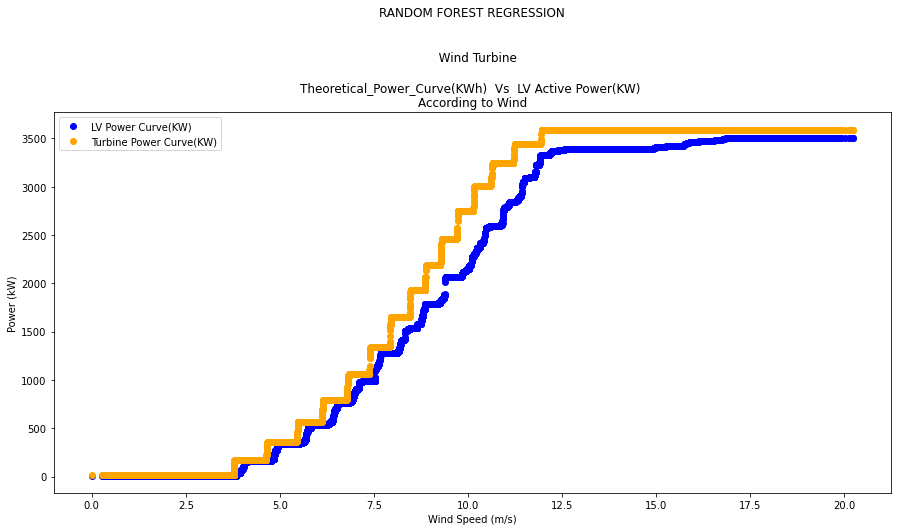

In [138]:
plt.figure(figsize=(15,7))
plt.plot(x_test1,y_predr1,'blue', marker="o",markersize=6,linewidth = 0,label="LV Power Curve(KW)")
plt.plot(x_test2,y_predr2,'orange', marker="o",markersize=6,linewidth = 0,label="Turbine Power Curve(KW)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.title("RANDOM FOREST REGRESSION\n\n\n   Wind Turbine\n\nTheoretical_Power_Curve(KWh)  Vs  LV Active Power(KW) \nAccording to Wind")
plt.legend()
plt.show()

# STEP-6
DEPLOYING THE BUILT MACHINE LEARNING MODEL i.e REQUIRED MODEL TO ACCOMPLISH THE OBJECTIVE OF THE PROJECT

In [139]:
#importing joblib
#using .dump() to store the '.sav' file in the current directory for further reference
#.sav--->Especially, used in games to save now and continue later. 
#If this feature wouldn't have been there then everytime we start playing, we should have restarted the game.
#Here, .sav is used for the purpose to save the model and can be used else where while deployment.

In [140]:
import joblib
joblib.dump(rf1,"power_prediction.sav")

['power_prediction.sav']